In [ ]:
!pip install "tf-models-official==2.13.*"

In [ ]:
!pip install -U "tensorflow-text==2.13.*"

In [1]:
import os
import shutil
from tensorflow.keras import layers
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [2]:
import pandas as pd
from datetime import timedelta
from datetime import datetime
import string
import numpy as np
import os

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns

In [4]:
from keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense,Dropout
from tensorflow.keras.metrics import MSE
from keras.models import load_model

In [5]:

X_train= pd.read_csv('X_train.csv')
y_train= pd.read_csv('y_train.csv')

X_val= pd.read_csv('X_val.csv')
y_val= pd.read_csv('y_val.csv')

X_test= pd.read_csv('X_test.csv')
y_test= pd.read_csv('y_test.csv')

In [6]:
X_train['all_words']=X_train['title']+' '+ X_train['selftext']
X_test['all_words']=X_test['title']+' '+ X_test['selftext']
X_val['all_words']=X_val['title']+' '+ X_val['selftext']

In [7]:
y_train=y_train.values
y_val=y_val.values
y_test=y_test.values

X_train=X_train['all_words'].apply(lambda x: str(x)).values
X_val=X_val['all_words'].apply(lambda x: str(x)).values
X_test=X_test['all_words'].apply(lambda x: str(x)).values


In [8]:
bert_model_name = 'small_bert/bert_en_uncased_L-2_H-256_A-4'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [32]:

# autosave best Model
best_model_file = "bertII.h5"
best_model = ModelCheckpoint(best_model_file, verbose=1, save_best_only=True, monitor='val_loss',mode='min')

In [28]:
#best_model =ModelCheckpoint('bertII.keras', save_best_only=True) .keras no supported

In [33]:
learning_rates = 0.00001 # lower lerning rate
batch_size=32
epochs=20

text_input =tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
encoder_inputs = preprocessing_layer(text_input)
encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
outputs = encoder(encoder_inputs)
net = outputs['pooled_output']


# Neural network layers
net=layers.Dropout(0.1)(net)
l = tf.keras.layers.Dense(128, activation='relu', name='h1')(net)
l = tf.keras.layers.Dense(64, activation='relu',name='h2')(l)
l = tf.keras.layers.Dense(32, activation='relu', name='h3')(l)
l = tf.keras.layers.Dense(16, activation='relu', name='h4')(l)

l =tf.keras.layers.Dense(1,name='output')(l)

model=tf.keras.Model(inputs=[text_input],outputs=[l])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rates)

model.compile(optimizer= optimizer, loss='mse', metrics=['mse'])

hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks=[best_model])


Epoch 1/20
925/925 [==============================] - ETA: 0s - loss: 0.9650 - mse: 0.9650
Epoch 1: val_loss improved from inf to 0.68439, saving model to bertII.h5
925/925 [==============================] - 210s 221ms/step - loss: 0.9650 - mse: 0.9650 - val_loss: 0.6844 - val_mse: 0.6844
Epoch 2/20
925/925 [==============================] - ETA: 0s - loss: 0.9375 - mse: 0.9375
Epoch 2: val_loss improved from 0.68439 to 0.65622, saving model to bertII.h5
925/925 [==============================] - 204s 220ms/step - loss: 0.9375 - mse: 0.9375 - val_loss: 0.6562 - val_mse: 0.6562
Epoch 3/20
925/925 [==============================] - ETA: 0s - loss: 0.9129 - mse: 0.9129
Epoch 3: val_loss improved from 0.65622 to 0.63530, saving model to bertII.h5
925/925 [==============================] - 205s 221ms/step - loss: 0.9129 - mse: 0.9129 - val_loss: 0.6353 - val_mse: 0.6353
Epoch 4/20
925/925 [==============================] - ETA: 0s - loss: 0.8895 - mse: 0.8895
Epoch 4: val_loss improved from

In [34]:
MSE_train = model.evaluate(X_train, y_train, verbose=0)[0]
MSE_val = model.evaluate(X_val, y_val, verbose=0)[0]
MSE_test = model.evaluate(X_test, y_test, verbose=0)[0]

print('MSE for train set', MSE_train)
print('MSE for val set', MSE_val)
print('MSE for test set', MSE_test)

MSE for train set 0.35805633664131165
MSE for val set 0.5601455569267273
MSE for test set 0.13951438665390015


In [36]:
best_model_file = "bertIII.h5"
best_model = ModelCheckpoint(best_model_file, verbose=1, save_best_only=True, monitor='val_loss',mode='min')

In [37]:
learning_rates = 0.00001 # lower learning rate
batch_size=32
epochs=20

text_input =tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
encoder_inputs = preprocessing_layer(text_input)
encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
outputs = encoder(encoder_inputs)
net = outputs['pooled_output']


# Neural network layers
net=layers.Dropout(0.5)(net)
l = tf.keras.layers.Dense(128, activation='relu', name='h1')(net)
l = tf.keras.layers.Dense(64, activation='relu',name='h2')(l)
l = tf.keras.layers.Dense(32, activation='relu', name='h3')(l)
l = tf.keras.layers.Dense(16, activation='relu', name='h4')(l)

l =tf.keras.layers.Dense(1,name='output')(l)

model=tf.keras.Model(inputs=[text_input],outputs=[l])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rates)

model.compile(optimizer= optimizer, loss='mse', metrics=['mse'])

hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks=[best_model])


Epoch 1/20
925/925 [==============================] - ETA: 0s - loss: 0.9909 - mse: 0.9909
Epoch 1: val_loss improved from inf to 0.70411, saving model to bertIII.h5
925/925 [==============================] - 209s 221ms/step - loss: 0.9909 - mse: 0.9909 - val_loss: 0.7041 - val_mse: 0.7041
Epoch 2/20
925/925 [==============================] - ETA: 0s - loss: 0.9715 - mse: 0.9715
Epoch 2: val_loss improved from 0.70411 to 0.69878, saving model to bertIII.h5
925/925 [==============================] - 204s 221ms/step - loss: 0.9715 - mse: 0.9715 - val_loss: 0.6988 - val_mse: 0.6988
Epoch 3/20
925/925 [==============================] - ETA: 0s - loss: 0.9656 - mse: 0.9656
Epoch 3: val_loss improved from 0.69878 to 0.69051, saving model to bertIII.h5
925/925 [==============================] - 205s 221ms/step - loss: 0.9656 - mse: 0.9656 - val_loss: 0.6905 - val_mse: 0.6905
Epoch 4/20
925/925 [==============================] - ETA: 0s - loss: 0.9554 - mse: 0.9554
Epoch 4: val_loss improved f

In [38]:
MSE_train = model.evaluate(X_train, y_train, verbose=0)[0]
MSE_val = model.evaluate(X_val, y_val, verbose=0)[0]
MSE_test = model.evaluate(X_test, y_test, verbose=0)[0]

print('MSE for train set', MSE_train)
print('MSE for val set', MSE_val)
print('MSE for test set', MSE_test)

MSE for train set 0.6481594443321228
MSE for val set 0.6313493251800537
MSE for test set 0.17811699211597443


In [11]:
best_model_file = "bertIV.h5"
best_model = ModelCheckpoint(best_model_file, verbose=1, save_best_only=True, monitor='val_loss',mode='min')

In [12]:
learning_rates = 0.0001 # higher lerning rate
batch_size=32
epochs=20

text_input =tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
encoder_inputs = preprocessing_layer(text_input)
encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
outputs = encoder(encoder_inputs)
net = outputs['pooled_output']


# Neural network layers
net=layers.Dropout(0.5)(net)
l = tf.keras.layers.Dense(128, activation='relu', name='h1')(net)
l = tf.keras.layers.Dense(64, activation='relu',name='h2')(l)
l = tf.keras.layers.Dense(32, activation='relu', name='h3')(l)
l = tf.keras.layers.Dense(16, activation='relu', name='h4')(l)

l =tf.keras.layers.Dense(1,name='output')(l)

model=tf.keras.Model(inputs=[text_input],outputs=[l])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rates)

model.compile(optimizer= optimizer, loss='mse', metrics=['mse'])

hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks=[best_model])


Epoch 1/20
925/925 [==============================] - ETA: 0s - loss: 0.9686 - mse: 0.9686
Epoch 1: val_loss improved from inf to 0.69415, saving model to bertIV.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


925/925 [==============================] - 211s 222ms/step - loss: 0.9686 - mse: 0.9686 - val_loss: 0.6942 - val_mse: 0.6942
Epoch 2/20
925/925 [==============================] - ETA: 0s - loss: 0.9292 - mse: 0.9292
Epoch 2: val_loss improved from 0.69415 to 0.60332, saving model to bertIV.h5
925/925 [==============================] - 205s 222ms/step - loss: 0.9292 - mse: 0.9292 - val_loss: 0.6033 - val_mse: 0.6033
Epoch 3/20
925/925 [==============================] - ETA: 0s - loss: 0.8199 - mse: 0.8199
Epoch 3: val_loss did not improve from 0.60332
925/925 [==============================] - 203s 220ms/step - loss: 0.8199 - mse: 0.8199 - val_loss: 0.6753 - val_mse: 0.6753
Epoch 4/20
925/925 [==============================] - ETA: 0s - loss: 0.8012 - mse: 0.8012
Epoch 4: val_loss did not improve from 0.60332
925/925 [==============================] - 204s 220ms/step - loss: 0.8012 - mse: 0.8012 - val_loss: 0.6589 - val_mse: 0.6589
Epoch 5/20
925/925 [==============================] - E

In [10]:
best_model_file = "bertV.h5"
best_model = ModelCheckpoint(best_model_file, verbose=1, save_best_only=True, monitor='val_loss',mode='min')

In [11]:
learning_rates = 0.000015 # lower lr
batch_size=34
epochs=30 # more epochs


text_input =tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
encoder_inputs = preprocessing_layer(text_input)
encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
outputs = encoder(encoder_inputs)
net = outputs['pooled_output']


# Neural network layers
net=layers.Dropout(0.5)(net)
l = tf.keras.layers.Dense(128, activation='relu', name='h1')(net)
l = tf.keras.layers.Dense(64, activation='relu',name='h2')(l)
l = tf.keras.layers.Dense(32, activation='relu', name='h3')(l)
l = tf.keras.layers.Dense(16, activation='relu', name='h4')(l)

l =tf.keras.layers.Dense(1,name='output')(l)

model=tf.keras.Model(inputs=[text_input],outputs=[l])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rates)

model.compile(optimizer= optimizer, loss='mse', metrics=['mse'])

hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks=[best_model])


Epoch 1/30
870/870 [==============================] - ETA: 0s - loss: 0.9779 - mse: 0.9779
Epoch 1: val_loss improved from inf to 0.69465, saving model to bertV.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


870/870 [==============================] - 226s 252ms/step - loss: 0.9779 - mse: 0.9779 - val_loss: 0.6947 - val_mse: 0.6947
Epoch 2/30
870/870 [==============================] - ETA: 0s - loss: 0.9574 - mse: 0.9574
Epoch 2: val_loss improved from 0.69465 to 0.67469, saving model to bertV.h5
870/870 [==============================] - 220s 253ms/step - loss: 0.9574 - mse: 0.9574 - val_loss: 0.6747 - val_mse: 0.6747
Epoch 3/30
870/870 [==============================] - ETA: 0s - loss: 0.9359 - mse: 0.9359
Epoch 3: val_loss improved from 0.67469 to 0.65213, saving model to bertV.h5
870/870 [==============================] - 218s 251ms/step - loss: 0.9359 - mse: 0.9359 - val_loss: 0.6521 - val_mse: 0.6521
Epoch 4/30
870/870 [==============================] - ETA: 0s - loss: 0.9223 - mse: 0.9223
Epoch 4: val_loss improved from 0.65213 to 0.63815, saving model to bertV.h5
870/870 [==============================] - 220s 253ms/step - loss: 0.9223 - mse: 0.9223 - val_loss: 0.6382 - val_mse: 0.6

In [13]:
best_model_file = "bertVI.h5"
best_model = ModelCheckpoint(best_model_file, verbose=1, save_best_only=True, monitor='val_loss',mode='min')


In [14]:
learning_rates = 0.0001 # higher
batch_size=32
epochs=30 # more epochs


text_input =tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
encoder_inputs = preprocessing_layer(text_input)
encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
outputs = encoder(encoder_inputs)
net = outputs['pooled_output']


# Neural network layers
net=layers.Dropout(0.5)(net)
l = tf.keras.layers.Dense(128, activation='relu', name='h1')(net)
l=layers.Dropout(0.5)(l)
l = tf.keras.layers.Dense(64, activation='relu',name='h2')(l)
l = tf.keras.layers.Dense(32, activation='relu', name='h3')(l)
l = tf.keras.layers.Dense(16, activation='relu', name='h4')(l)

l =tf.keras.layers.Dense(1,name='output')(l)

model=tf.keras.Model(inputs=[text_input],outputs=[l])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rates)

model.compile(optimizer= optimizer, loss='mse', metrics=['mse'])

hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),callbacks=[best_model])


Epoch 1/30
925/925 [==============================] - ETA: 0s - loss: 0.9897 - mse: 0.9897
Epoch 1: val_loss improved from inf to 0.70626, saving model to bertVI.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


925/925 [==============================] - 227s 239ms/step - loss: 0.9897 - mse: 0.9897 - val_loss: 0.7063 - val_mse: 0.7063
Epoch 2/30
925/925 [==============================] - ETA: 0s - loss: 0.9695 - mse: 0.9695
Epoch 2: val_loss did not improve from 0.70626
925/925 [==============================] - 221s 239ms/step - loss: 0.9695 - mse: 0.9695 - val_loss: 0.7065 - val_mse: 0.7065
Epoch 3/30
925/925 [==============================] - ETA: 0s - loss: 0.9702 - mse: 0.9702
Epoch 3: val_loss improved from 0.70626 to 0.70605, saving model to bertVI.h5
925/925 [==============================] - 221s 239ms/step - loss: 0.9702 - mse: 0.9702 - val_loss: 0.7061 - val_mse: 0.7061
Epoch 4/30
925/925 [==============================] - ETA: 0s - loss: 0.9686 - mse: 0.9686
Epoch 4: val_loss improved from 0.70605 to 0.70524, saving model to bertVI.h5
925/925 [==============================] - 222s 240ms/step - loss: 0.9686 - mse: 0.9686 - val_loss: 0.7052 - val_mse: 0.7052
Epoch 5/30
925/925 [====

In [ ]:
hist.history

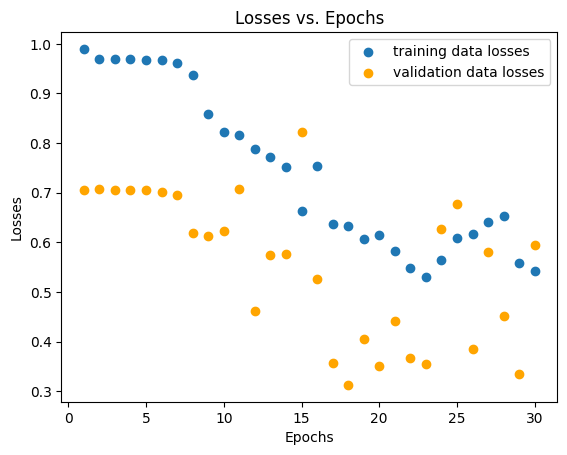

In [17]:

plt.scatter(range(1,31), hist.history['loss'], label='training data losses')
plt.scatter(range(1,31), hist.history['val_loss'], label='validation data losses', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Losses vs. Epochs')
plt.legend( )
plt.show()

In [21]:
# Recreate the exact same model, including its weights and the optimizer
final_model = tf.keras.models.load_model('bertVI.h5',
       custom_objects={'KerasLayer':hub.KerasLayer}
)


In [22]:
MSE_train = final_model.evaluate(X_train, y_train, verbose=0)[0]
MSE_val = final_model.evaluate(X_val, y_val, verbose=0)[0]
MSE_test = final_model.evaluate(X_test, y_test, verbose=0)[0]

print('MSE for train set', MSE_train)
print('MSE for val set', MSE_val)
print('MSE for test set', MSE_test)

MSE for train set 0.5702778100967407
MSE for val set 0.31274986267089844
MSE for test set 0.11690182238817215


In [24]:
#Predictions
Y_test_hat=final_model.predict(X_test)

199/199 [==============================] - 15s 72ms/step


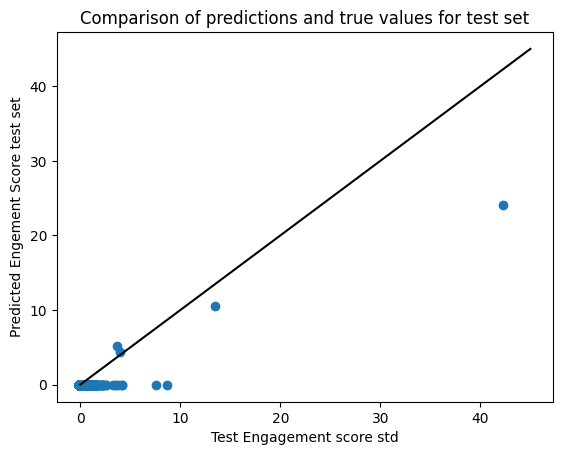

In [36]:

plt.scatter(y_test, Y_test_hat, label='training data losses')
plt.plot([0,45], [0,45], 'k-')
plt.xlabel('Test Engagement score std')
plt.ylabel('Predicted Engement Score test set')
plt.title('Comparison of predictions and true values for test set')
plt.show()

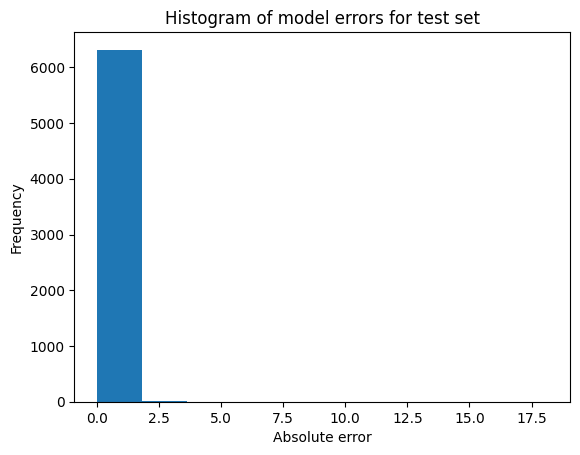

In [82]:
plt.hist(abs((Y_test_hat-y_test)))
plt.xlabel('Absolute error')
plt.ylabel('Frequency')
plt.title('Histogram of model errors for test set')
plt.show()

## Worst prediction

In [ ]:
X_test= pd.read_csv('X_test.csv')
y_test_org= pd.read_csv('y_test.csv')

In [58]:
y_test.max()

42.247149832468594

In [52]:
y_testmax=y_test.max()

In [83]:
(abs(Y_test_hat-y_test)).max()

18.155576117258633

In [57]:
y_test_org[y_test_org['engagement_score_std']==y_testmax]

,engagement_score_std
5071,42.24715


In [63]:
ind_max=y_test_org[y_test_org['engagement_score_std']==y_testmax].index
X_test.iloc[ind_max].T

,5071
id,l70sjp
author,OPINION_IS_UNPOPULAR
created,2021-01-28 16:08:15
retrieved,2021-02-04 22:20:33
edited,1970-01-01 00:00:00
pinned,0
archived,0
locked,1
removed,0
deleted,0


In [64]:
X_test['fulltext'][ind_max]

,fulltext
5071,daily discussion thread part 3 for january 28 2021 your daily trading discussion thread please keep the shitposting to a minimum navigate wsb we recommend best daily dd dd all best daily best weekly discussion all best daily best weekly yolo all best daily best weekly gain all best daily best weekly loss all best daily best weekly weekly earnings discussion thread read the rules and make sure other people follow them try no meme mode also accessible through the top bar check out wsb gold stats generated live from wsb activity


### Best prediction

In [84]:
(abs(Y_test_hat-y_test)).min()

1.574388888541528e-05

In [85]:
print('index_worst prediction',np.argmax(abs((Y_test_hat-y_test))))

index_best prediction 5071


In [87]:
print('index_best prediction',np.argmin(abs((Y_test_hat-y_test))))

index_best prediction 46


#Best prediction
print('index_best prediction',np.argmin(abs((Y_test_hat-y_test))))

X_test.iloc[46].T

In [91]:
X_test['fulltext'][46]

' ssft healthy consolidation in the mid 20 s bullish chart setup going into next week ssft looking bullish on a number of levels going into next week chart setting up beautifully after healthy consolidation in the mid 20s hi team just a super quick overview of my thoughts on the basic technicals going into next week notable stock consolidating on lower volumes forming new base support in mid 20 s gap from feb 8th filled on friday at 205 bouncing off 10day moving avg bullish 50day moving avg is about to cross above 200day moving avg bullish rsi cooled off to 63 62 this is primed for run up to next levels imo chart screaming for 40 in the near term in my opinion before perhaps consolidating forming new base in mid 30 s then rinse repeat any catalyst could really send this thing flying imo if anyone is new to this stock and is interesting in exploring more here are links to some other informative posts very interesting and well written post by a reddit user with a much stronger comprehens

In [92]:
y_test[46]

array([-0.03371051])

In [95]:
Y_test_hat[46]

array([-0.03372625], dtype=float32)

### Error distribution

In [114]:
pd.Series((Y_test_hat-y_test).flatten(),name='Model_error').describe()

,Model_error
count,6338.000000
mean,-0.003728
std,0.341916
min,-18.155576
25%,0.029265
50%,0.043407
75%,0.048122
max,1.492147


In [120]:
pd.Series(abs(Y_test_hat-y_test).flatten(),name='Model_error').describe()

,Model_error
count,6338.000000
mean,0.075620
std,0.333468
min,0.000016
25%,0.036928
50%,0.045363
75%,0.049139
max,18.155576


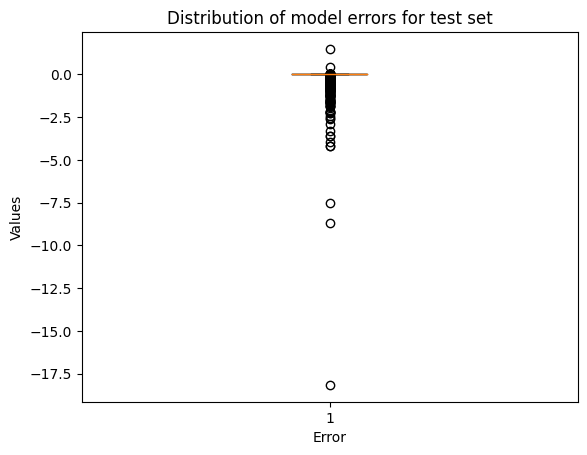

In [116]:
error=pd.Series((Y_test_hat-y_test).flatten())
plt.boxplot(error)
plt.xlabel('Error')
plt.ylabel('Values')
plt.title('Distribution of model errors for test set')
plt.show()

### Group of bad predictions

In [126]:
ind=error[abs(error)>1].index
X_test['fulltext'][ind]

55      you fuckers really think i m going to sell at ...
216     reminder shorts have not covered and are lying...
230     you don t always have to be invested sometimes...
451      grandpa died and i inherited enough for xxxx ...
459     to all of you who are red this year while the ...
622     it is awesome this sub is growing so fast 7mm ...
635     i built a program that tracks mentions and sen...
704     china asks local goverments to get ready for p...
844     apple reports another blowout quarter with sal...
855     non fire people tend to get upset and defensiv...
973     elon musk implies tesla has sold all of their ...
1057    attention everyone holding gme calls if you ha...
1227    the sec is going too easy on insider trading i...
1328    what is citadel and where do i go to get away ...
1445    sec restricted gme short sell time to fly ibkr...
1524    type a dad jumps to my defense for context my ...
1747    why i m in on nokia nok dd i think nok has gre...
1769    how do i cash in a paper stock certificate i m...
1777    gme was an important moment i posted this as a...
1824     crsr corsair dd the q4 results are basically ...
1831    live charting for 3 15 2021 predicting the day...
2090    market sentiment and technicals are indicating...
2099    gme price action dd making higher lows and tur...
2232    uber loses u k top court ruling on drivers emp...
2300    just hit 1 million nw by 28 the boring way dec...
2896    biden administration will continue chinese tec...
3042    due diligence of bitcoin mining stock valuatio...
3050    why i think the market will see a 30 50 correc...
3126    what are your moves tomorrow december 20 2021 ...
3149    warning if you clutter the sub you will be per...
3157    gamestop institutional broker trades off the e...
3165    elon musk tesla will no longer accept bitcoin ...
3257    are any of you planning on working no stress f...
3375    to all shorts save yourselves don t go down wi...
3387    do not pressure the sec to take action a polit...
3521    this is not a full dd this is a post saying do...
3542    what are your moves tomorrow january 08 2021 y...
3600    i made 500 000 trading stocks and options in 1...
3639    dave buster s the power play gather round dege...
3806    limits are being lifted now is the time to buy...
3833    what are your next below 50 below 30 below 20 ...
3921    i m not going to look at r gme for the rest of...
4006    attention looking for all who suffered a loss ...
4387    be mentally prepared for this fall back to 180...
4484    been seeing alot of posts with questions like ...
4557    unpinned daily discussion thread for february ...
4832    daily popular tickers thread for august 11 202...
4934    stuff for new traders no gme discussion i gott...
5067     bb people underestimate blackberry s qnx oper...
5071    daily discussion thread part 3 for january 28 ...
5309     nok i ve been making several posts about noki...
5319    i am selling all of my positions and withdrawi...
5364    michael burry of the big short reveals a 530 m...
5379    you need to upvote every single post positivel...
5432    last year the top 25 managers earned 32 billio...
6178    if you want to learn how to trade please don t...
6287    hurricane ida is worst in 170 years how to ban...
Name: fulltext, dtype: object

In [128]:
y_test[ind]

array([[ 4.17553194],
       [ 2.08627046],
       [ 1.40760436],
       [ 1.61856896],
       [ 1.55494943],
       [ 1.15948271],
       [ 2.18632017],
       [ 1.01611158],
       [ 0.99426213],
       [ 1.1952927 ],
       [ 1.65785929],
       [ 1.03059488],
       [ 1.79446247],
       [ 2.17625126],
       [ 1.24191295],
       [ 1.79543229],
       [ 1.49950905],
       [ 2.5598665 ],
       [ 1.4532706 ],
       [ 1.87075617],
       [ 2.1408213 ],
       [ 1.50049205],
       [ 1.10894601],
       [ 1.14353299],
       [ 1.21731372],
       [ 0.98593684],
       [ 1.23772718],
       [ 3.5752936 ],
       [ 3.63403074],
       [ 1.49459994],
       [ 1.82185774],
       [ 1.65066978],
       [ 1.25744117],
       [ 1.29689181],
       [ 1.75920921],
       [ 1.57238142],
       [13.46801539],
       [ 1.62139507],
       [ 1.14060555],
       [ 8.66511826],
       [ 1.23896419],
       [ 2.52542688],
       [ 0.99252623],
       [ 3.89771654],
       [ 1.44114127],
       [ 7

In [129]:
len(ind)

57